### 1) Final project

The corpus for my final project comes from the CLiC Dickens project from Birningham University (clic.bham.ac.uk). It includes a 19th Century Reference Corpus, generically different but mostly novels (75 texts) and 19th Century Children’s Literature Corpus, mostly short stories and novels (71 texts). So this makes a total of 146 documents, with 80942448 words. The sources are the Gutenberg.org plain text UTF 8 files. The texts were cleaned accordingly: 1) Converted to unix line endings, 2)Non-authorial text has been removed, 2) The book title and the author has been reformatted to make it consistent across all texts, 4) Chapter headings have been reformatted to make it consistent across all texts, 5) manual corrections have been made. 
They also provide a bib. file with the following information: file name, name of the corpus, title, author, date (first publication), editor (optional). I'm thinking of building a smaller 19C German literature corpus as well (~100 texts) and clean it as described above. I'm going to extract the texts with urlib.request in Python from Gutenberg.org. 

### 2) Embed a Voyant tool

I'm going to use 26 texts from my 19 Century Entlish literature corpus and look at the term frequency in voyant. I embed the tool in my jupyter notebook. 

In [15]:
from IPython.display import IFrame  

In [22]:
IFrame("https://voyant-tools.org/tool/Cirrus/?corpus=ec9e4e21f49d6fac85da57be8a354df6", width=400, height=400) 

Wow, that's great! 

Here we see the 55 most frequent terms in 29 texts from 19 Century English literature. I went with the default version stopword list in voyant. Words of high frequency that are used here that are of interest to me are: "mind", "hand", "eyes", "face", "room", "house", etc. .. . Words that describe body parts are used a lot. This goes very much  in lign with the assumption in literary history, that 19 Century literature focuses more on the body and mind - the psychological interiority of characters - at the excempt of the social world. 


### 3) Term frequency graph

In [23]:
import nltk
import glob
import re
import os

In [27]:
textfiles = glob.glob("19English/*txt") # list files in local directory  
textfiles

[]

In [28]:
os.system('cp -r ~/Desktop/19English ./') # copy files into subdirectory 

0

In [29]:
textfiles = glob.glob("19English/*txt") # list files in local directory  
textfiles

['19English/AgnesG.txt',
 '19English/alli.txt',
 '19English/Antoni.txt',
 '19English/arma.txt',
 '19English/basker.txt',
 '19English/cran.txt',
 '19English/Deronda.txt',
 '19English/dorian.txt',
 '19English/dracula.txt',
 '19English/emma.txt',
 '19English/frank.txt',
 '19English/jane.txt',
 '19English/Jekyll.txt',
 '19English/Jude.txt',
 '19English/LadyAud.txt',
 '19English/mary.txt',
 '19English/mill.txt',
 '19English/native.txt',
 '19English/NorthS.txt',
 '19English/persuasion.txt',
 '19English/Pomp.txt',
 '19English/pride.txt',
 '19English/Prof.txt',
 '19English/sybil.txt',
 '19English/Tess.txt',
 '19English/vanity.txt',
 '19English/VivianG.txt',
 '19English/wh.txt',
 '19English/wwhite.txt']

In [30]:
textList=[]
for textFile in textfiles: # create a list 
    f = open(textFile, "r")
    textList = textList + [f.read().upper()]
    f.close()
len(textList)

29

In [31]:
novelsString=""
for text in textList:
    novelsString = novelsString +"\n"+text
len(novelsString)

25032399

In [34]:
# simple lowercase tokenize
novelsTokensLowercase = nltk.word_tokenize(novelsString.lower())

# filter out tokens that aren't words
novelsWordTokensLowercase = [word for word in novelsTokensLowercase if word[0].isalpha()]

# determine frequencies
novelsWordTokensLowercaseFreqs = nltk.FreqDist(novelsWordTokensLowercase)

# preview the top 20 frequencies
novelsWordTokensLowercaseFreqs.tabulate(20)

   the    and     to     of      i      a     in    was     he   that    her     it    you    his    had    she     as   with    not    for 
232673 143904 130454 127300  92306  91697  74053  59935  59375  58560  55082  52124  48072  47153  43081  42953  39799  37334  36070  34928 


In [35]:
stopwords = nltk.corpus.stopwords.words("english")

In [37]:
novelsRealContentWordTokensLowercase = [word for word in novelsWordTokensLowercase \
        if word[0].isalpha() and word not in stopwords]
novelsRealContentWordFrequencies = nltk.FreqDist(novelsRealContentWordTokensLowercase)
novelsRealContentWordFrequencies.tabulate(55)

   said   would     one   could     n't     mr.  little     man    time    know    like    must   never     see    well   think    miss    come    much   might     say      go    mrs.    upon thought    made    good   first    lady     may   shall      us     way     old     day   house    came     two     sir   great    back    life    last     yet    away  father   still    face    long without nothing    eyes  looked    make  though 
  20852   15725   13401   11997   10999    9534    8219    7710    7596    7415    7096    6893    6685    6500    6254    6247    6202    6095    6063    6027    5843    5648    5606    5412    5364    5297    5180    5121    5043    4881    4826    4784    4772    4762    4726    4688    4619    4618    4612    4504    4466    4455    4364    4235    4227    4145    4145    4139    4074    4068    4063    4053    3953    3944    3918 


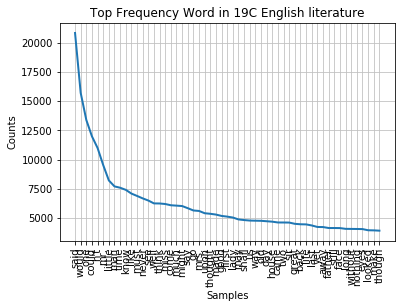

In [39]:
%matplotlib inline

# plot the top frequency words of my corpus in a graph
novelsRealContentWordFrequencies.plot(55, title="Top Frequency Word in 19C English literature")

Ok, I think 55 words are too much here. Anyway, I think python has less stopwords then voyant has, but body parts as "eyes" and "face" do also appear here. What is also interesting to me, is that "time" appears with such a high frequency. Now it is plotted by samples and counts, would be interested to plot it by year. 